In [1]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt

# tattoo = np.loadtxt("/content/drive/My Drive/EE183DB/Tattoo Points-to-Commands/flatTattoo.txt")
tattoo = np.loadtxt("/content/drive/My Drive/EE183DB/Tattoo Points-to-Commands/HorizontalLine.txt")

In [4]:
# Range of webots table
x_range = [1.2, 2.2]
y_range = [-0.5, 0.5]
print("X Goal Range: [1.2, 2.2]\nY Goal Range: [-0.5, 0.5]\n")

# Tattoo Data
tattoo_x = tattoo[:, 0]
tattoo_y = tattoo[:, 2]

# Find the width and length of the tattoo
x_max = np.max(tattoo_x)
x_min = np.min(tattoo_x)
y_max = np.max(tattoo_y)
width = x_max - x_min

y_max = np.max(tattoo_y)
y_min = np.min(tattoo_y)
length = y_max - y_min

print("Original\n--------------------------------")
print("X Range: [%f, %f]\nY Range: [%f, %f]"%(x_min, x_max, y_min, y_max))
print("Width (x): %f\nLength (y): %f"%(width, length))

# Use width and length to scale the data
scale_ratio = min(x_range[1] - x_range[0], y_range[1] - y_range[0]) / max(length, width)
tattoo_x = tattoo_x * scale_ratio
tattoo_y = tattoo_y * scale_ratio

x_max = np.max(tattoo_x)
x_min = np.min(tattoo_x)
y_max = np.max(tattoo_y)
width = x_max - x_min

y_max = np.max(tattoo_y)
y_min = np.min(tattoo_y)
length = y_max - y_min

print("\nAfter Scaling by %f\n--------------------------------"%(scale_ratio))
print("X Range: [%f, %f]\nY Range: [%f, %f]"%(x_min, x_max, y_min, y_max))
print("Width (x): %f\nLength (y): %f"%(width, length))

# Shift the data
shift_x = x_range[0] - x_min
shift_y = y_range[0] - y_min
tattoo_x = tattoo_x + shift_x
tattoo_y = tattoo_y + shift_y

x_max = np.max(tattoo_x)
x_min = np.min(tattoo_x)
width = x_max - x_min

y_max = np.max(tattoo_y)
y_min = np.min(tattoo_y)
length = y_max - y_min

print("\nAfter X by %f and Y by %f\n--------------------------------"%(shift_x, shift_y))
print("X Range: [%f, %f]\nY Range: [%f, %f]"%(x_min, x_max, y_min, y_max))
print("Width (x): %f\nLength (y): %f"%(width, length))



X Goal Range: [1.2, 2.2]
Y Goal Range: [-0.5, 0.5]

Original
--------------------------------
X Range: [1.933170, 1.948090]
Y Range: [-3.199036, 2.029050]
Width (x): 0.014920
Length (y): 5.228086

After Scaling by 0.191275
--------------------------------
X Range: [0.369766, 0.372620]
Y Range: [-0.611894, 0.388106]
Width (x): 0.002854
Length (y): 1.000000

After X by 0.830234 and Y by 0.111894
--------------------------------
X Range: [1.200000, 1.202854]
Y Range: [-0.500000, 0.500000]
Width (x): 0.002854
Length (y): 1.000000


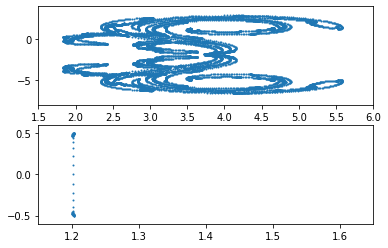

In [5]:
plt.subplot(2, 1, 1)
plt.ylim(-8, 4)
plt.xlim(1.5, 6)
plt.scatter(tattoo[:, 0], tattoo[:, 2], s=1)

plt.subplot(2, 1, 2)
plt.ylim(-0.6, 0.6)
plt.xlim(1.15,1.65)
plt.scatter(tattoo_x, tattoo_y, s=1)

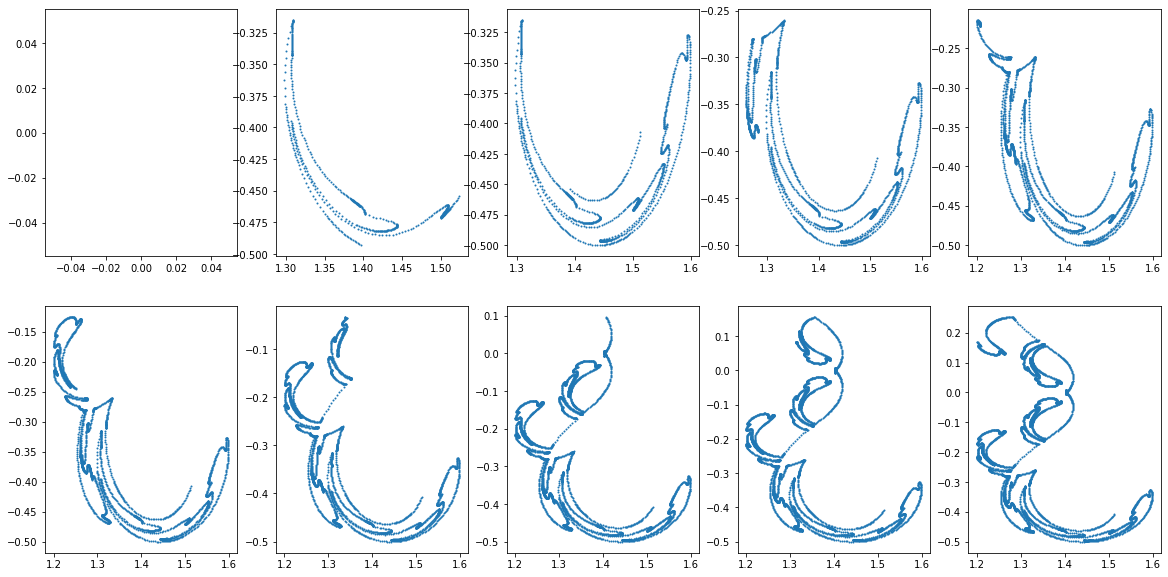

In [0]:
start = 0
interval = 500
num_intervals = 10

plt.figure(figsize=(20, 10))

for i in range(0, num_intervals):
  plt.subplot(2, num_intervals/2, i + 1)
  end = i*interval
  plt.scatter(tattoo_x[start:end], tattoo_y[start:end], s = 1)
